In [1]:
# coding utf-8
import pandas as pd
import requests
import numpy as np
from datetime import datetime, date, time
import matplotlib.pyplot as plt
import time
from tkinter import *
import mpld3
import json

In [2]:
dict_sample = {
    'last_seen_platform': {
        '1': 'мобильная версия',
        '2': 'приложение для iPhone',
        '3': 'приложение для iPad',
        '4': 'приложение для Android',
        '5': 'приложение для Windows Phone',
        '6': 'приложение для Windows 10',
        '7': 'полная версия сайта',
        '-': 'информация недоступна'},
    'age_groups': {
        '1': 'до 18',
        '2': 'от 18 до 31',
        '3': 'от 31 до 44',
        '4': 'от 44 до 60',
        '5': 'старше 60',
        '-': 'информация недоступна'},
    'occupation_type': {
        'school': 'школьник',
        'university': 'студент',
        'work': 'работает',
        '-': 'информация недоступна'},
    'relation': {
        '1': 'не женат/не замужем',
        '2': 'есть друг/есть подруга',
        '3': 'помолвлен/помолвлена',
        '4': 'женат/замужем',
        '5': 'всё сложно',
        '6': 'в активном поиске',
        '7': 'влюблён/влюблена',
        '8': 'в гражданском браке',
        '0': 'не указано',
        '-': 'информация недоступна'},
    'sex': {
        '1': 'женщины',
        '2': 'мужчины',
        '0': 'не указано'},
}

titles_for_hists = {
    'last_seen_platform_age_groups': {
        'title': 'Гистограмма распределения выбора платформы для доступа к социальной сети Вконтакте\n в зависимости '
                 'от возрастной группы',
        'title_Y': 'Платформа для доступа',
        'title_legend': 'Возрастная группа'},

    'last_seen_platform_occupation_type': {
        'title': 'Гистограмма распределения выбора платформы для доступа к социальной сети Вконтакте\n в зависимости '
                 'от рода деятельности',
        'title_Y': 'Платформа для доступа',
        'title_legend': 'Род деятельности'},

    'relation_last_seen_platform': {
        'title': 'Гистограмма распределения семейного положения\n в зависимости от выбора платформы для доступа к '
                 'социальной сети Вконтакте',
        'title_Y': 'Семейное положение',
        'title_legend': 'Платформа для доступа'},

    'last_seen_platform_sex': {
        'title': 'Гистограмма распределения выбора платформы для доступа к социальной сети Вконтакте\n в зависимости '
                 'от пола',
        'title_Y': 'Платформа для доступа',
        'title_legend': 'Пол'},

    'country_title_last_seen_platform': {
        'title': 'Гистограмма распределения географического положения\n в зависимости от выбора платформы для доступа '
                 'к социальной сети Вконтакте',
        'title_Y': 'Страна',
        'title_legend': 'Платформа для доступа'},

    'age_groups_occupation_type': {
        'title': 'Гистограмма распределения возрастных групп\n в зависимости от рода деятельности',
        'title_Y': 'Возрастная группа',
        'title_legend': 'Род деятельности'},

    'relation_age_groups': {
        'title': 'Гистограмма распределения семейного положения\n в зависимости от возрастной группы',
        'title_Y': 'Семейное положение',
        'title_legend': 'Возрастная группа'},

    'age_groups_sex': {
        'title': 'Гистограмма распределения возрастных групп\n в зависимости от пола',
        'title_Y': 'Возрастная группа',
        'title_legend': 'Пол'},

    'country_title_age_groups': {
        'title': 'Гистограмма распределения географического положения\n в зависимости от возрастной группы',
        'title_Y': 'Страна',
        'title_legend': 'Возрастная группа'},

    'relation_occupation_type': {
        'title': 'Гистограмма распределения семейного положения\n в зависимости от рода деятельности',
        'title_Y': 'Семейное положение',
        'title_legend': 'Род деятельности'},

    'occupation_type_sex': {
        'title': 'Гистограмма распределения рода деятельности\n в зависимости от пола',
        'title_Y': 'Род деятельности',
        'title_legend': 'Пол'},

    'country_title_occupation_type': {
        'title': 'Гистограмма распределения географического положения\n в зависимости от рода деятельности',
        'title_Y': 'Страна',
        'title_legend': 'Род деятельности'},

    'relation_sex': {
        'title': 'Гистограмма распределения семейного положения\n в зависимости от пола',
        'title_Y': 'Семейное положение',
        'title_legend': 'Пол'},

    'country_title_relation': {
        'title': 'Гистограмма распределения географического положения\n в зависимости от семейного положения',
        'title_Y': 'Страна',
        'title_legend': 'Семейное положение'},

    'country_title_sex': {
        'title': 'Гистограмма распределения географического положения\n в зависимости от пола',
        'title_Y': 'Страна',
        'title_legend': 'Пол'},

    'city_title_relation': {
        'title': 'Гистограмма распределения регионального расположения\n в зависимости от семейного положения',
        'title_Y': 'Город',
        'title_legend': 'Семейное положение'},

    'city_title_sex': {
        'title': 'Гистограмма распределения регионального расположения\n в зависимости от пола',
        'title_Y': 'Город',
        'title_legend': 'Пол'},

    'city_title_last_seen_platform': {
        'title': 'Гистограмма распределения регионального расположения\n в зависимости от выбора платформы для '
                 'доступа к социальной сети Вконтакте',
        'title_Y': 'Город',
        'title_legend': 'Платформа для доступа'},

    'city_title_age_groups': {
        'title': 'Гистограмма распределения регионального расположения\n в зависимости от возрастной группы',
        'title_Y': 'Город',
        'title_legend': 'Возрастная группа'},

    'city_title_occupation_type': {
        'title': 'Гистограмма распределения регионального расположения\n в зависимости от рода деятельности',
        'title_Y': 'Город',
        'title_legend': 'Род деятельности'},
    'city_title_country_title': {
        'title': 'Гистограмма распределения географического расположения\n в зависимости от географического положения',
        'title_Y': 'Город',
        'title_legend': 'Страна'}
}

In [22]:
def take_all_members(limit_of_request, domain):
    token = "5343fbfa5343fbfa5343fbfa75532dfc8d553435343fbfa0d5cf54c0d863d963693d525"
    version = 5.92
    # domain = 'akylikea'
    fields = 'bdate,city,country,last_seen,occupation,relation,sex'
    count = 1000
    offset = 0
    response = requests.get('https://api.vk.com/method/groups.getMembers',
                            params={
                                'offset': offset,
                                'count': count,
                                'access_token': token,
                                'group_id': domain,
                                'v': version,
                                'fields': fields
                            }
                            )
    num_items = response.json()['response']['count']

    if num_items < count:
        count = num_items
        print(1, 'num_items', num_items, 'count', count)

    response = requests.get('https://api.vk.com/method/groups.getMembers',
                            params={
                                'offset': offset,
                                'count': count,
                                'access_token': token,
                                'group_id': domain,
                                'v': version,
                                'fields': fields
                            }
                            )
    data = response.json()['response']['items']
    all_members = data
    num_items -= count

    while offset < limit_of_request and num_items > 0:
        offset += count
        if num_items < count:
            count = num_items
        num_items -= count
        response = requests.get('https://api.vk.com/method/groups.getMembers',
                                params={
                                    'offset': offset,
                                    'count': count,
                                    'access_token': token,
                                    'group_id': domain,
                                    'v': version,
                                    'fields': fields
                                }
                                )
        data = response.json()['response']['items']
        all_members = list(np.append(all_members, data))
    return all_members


def translator_func(word_str):
    url = 'https://translate.yandex.net/api/v1.5/tr.json/translate?'
    key = 'trnsl.1.1.20200422T011416Z.46367ff183a11535.14623f793eebb55543fdd0106ee0f633d6e294e1'
    text = word_str
    lang = 'en-ru'
    r = requests.post(url, data={'key': key, 'text': text, 'lang': lang})
    decoded = json.loads(r.text)
    return decoded['text'][0]


def making_data_frame(all_memberss):
    columns = [['first_name'], ['sex'], ['bdate'], ['relation']]
    l = len(all_memberss)

    for col in columns:
        for i in range(0, l):
            try:
                col.append(all_memberss[i][col[0]])
            except KeyError:
                col.append('-')

    columns_dop = [['city', 'title'],
                   ['country', 'title'],
                   ['last_seen', 'time'], ['last_seen', 'platform'],
                   ['occupation', 'type']]

    for col in columns_dop:
        for i in range(0, l):
            try:
                col.append(all_memberss[i][col[0]][col[1]])
            except KeyError:
                col.append('-')

    for col in columns_dop:
        col[0] = col[0] + '_' + col[1]
        del col[1]

    columns.extend(columns_dop)
    data_arr = np.array(columns)
    data_arr = data_arr.transpose()

    df = pd.DataFrame(data_arr[1:], columns=data_arr[0])
    return df


def get_last_time(last_seen_time):
    timestamp = int(time.time())
    seconds_in_day = 60 * 60 * 24
    if last_seen_time != '-':
        seconds_from_last_seen = timestamp - int(last_seen_time)
        if seconds_from_last_seen <= seconds_in_day * 7:
            last_time = 'active'
        else:
            last_time = 'inactive'
    else:
        last_time = '-'
    return last_time


def accounts_activity(df):
    df['activity'] = [get_last_time(item) for item in df['last_seen_time']]

    num_active = len(df[df.activity == 'active'])
    num_inactive = len(df[df.activity == 'inactive'])
    num_no_act_inf = len(df[df.activity == '-'])
    num_deleted = len(df[df.first_name == 'DELETED'])

    act_el_clear = [num_active, num_inactive, num_no_act_inf, num_deleted]
    all_act = len(df)
    act_el = [i / all_act * 100 for i in act_el_clear]
    labels = ["%1.1f%%" % i for i in act_el]

    fig, ax = plt.subplots()
    s = [num_active, num_inactive, num_no_act_inf]
    x = np.arange(len(s))
    ax.set_xticks(x)
    ax.set_xticklabels(['Активные аккаунты', 'Малоактивные аккаунты\n (последняя активность\n более 7 дней назад)',
                        'Нет информации\n об активности аккаунтов'], fontsize=12)
    ax.bar(x, s, color='paleturquoise', width=0.5)
    ax.bar(2, num_deleted, color='orchid', alpha=0.5)
    ax.legend(['Существующие аккаунты', 'Удаленные аккаунты'], fontsize=12, title='Тип аккаунта', title_fontsize=12)
    ax.set_title('Активность аккаунтов сообщества', fontsize=14)

    for i in range(3):
        ax.text(i, act_el_clear[i] / 2, labels[i], ha='center', va='center', fontsize=12)
    ax.text(2.35, act_el_clear[3], labels[3], ha='center', va='bottom', fontsize=12)

    fig.set_figwidth(12)  # ширина и
    fig.set_figheight(6)  # высота "Figure"
    plt.yticks(fontsize=12)
    plt.ylabel('Число аккаунтов', fontsize=13)

    #dst_hist = mpld3.fig_to_html(fig)
    #plt.savefig('Активность аккаунтов сообщества.png')
    #plt.close()
    plt.show()
    return True
    #dst_hist


def get_age(birthday_str):
    try:
        birthdate = datetime.strptime(birthday_str, '%d.%m.%Y').date()
        today = date.today()
        age = today.year - birthdate.year
        if today.month < birthdate.month:
            age -= 1
        elif today.month == birthdate.month and today.day < birthdate.day:
            age -= 1
    except ValueError:
        age = '-'
    return age


def age_group(age):
    if age == '-':
        group_id = '-'
    else:
        age_val = int(age)
        if age_val < 18:
            group_id = '1'
        elif 18 <= age_val < 31:
            group_id = '2'
        elif 31 <= age_val < 44:
            group_id = '3'
        elif 44 <= age_val < 60:
            group_id = '4'
        else:
            group_id = '5'

    return group_id


def countries(hist_df):
    hist_df1 = hist_df.copy()
    hist_df1 = hist_df1.sort_values('Сумма', ascending=True)
    check_sum = 0
    while True:
        for i in range(len(hist_df1['Сумма']) - 1, -1, -1):
            check_sum += hist_df1['Сумма'][i]
            if (check_sum >= hist_df1['Сумма'].sum() * 0.95) or (len(hist_df1['Сумма']) - i > 10):
                break
        break
    hist_df1 = hist_df1.reset_index()
    hist_df1 = hist_df1.transpose()
    for j in range(i - 2, -1, -1):
        hist_df1[i - 1] = hist_df1[i - 1] + hist_df1[j]
        del hist_df1[j]
    hist_df1[i - 1]['index'] = 'Остальные'
    hist_df1 = hist_df1.transpose()
    # hist_df = hist_df.sort_values('Сумма')
    del hist_df1['Сумма']
    indexes = [translator_func(x) for x in hist_df1['index']]
    hist_df1.index = indexes
    del hist_df1['index']
    return hist_df1


def hist_df_construct(feature_X, feature_Y, df):
    h_vals_r = []
    if (feature_Y == 'country_title') or (feature_Y == 'city_title'):
        for key_Y in set(df[feature_Y]):
            h_vals_el = []
            for key_X, val_X in dict_sample[feature_X].items():
                h_sum = len(df[(df.first_name != 'DELETED') & (df[feature_X] == key_X) & (df[feature_Y] == key_Y)])
                h_vals_el.append(h_sum)
            h_vals_el.append(sum(h_vals_el))
            h_vals_r.append(h_vals_el)

    else:
        for key_Y, val_Y in dict_sample[feature_Y].items():
            h_vals_el = []
            for key_X, val_X in dict_sample[feature_X].items():
                h_sum = len(df[(df.first_name != 'DELETED') & (df[feature_X] == key_X) & (df[feature_Y] == key_Y)])
                h_vals_el.append(h_sum)
            h_vals_el.append(sum(h_vals_el))
            h_vals_r.append(h_vals_el)

    if feature_Y == 'country_title' or (feature_Y == 'city_title'):
        indexes = [x for x in set(df[feature_Y])]
        ind_of_desh = indexes.index('-')
        indexes[ind_of_desh] = 'информация недоступна'
    else:
        indexes = [val_Y for key_Y, val_Y in dict_sample[feature_Y].items()]

    columns = [x for x in dict_sample[feature_X].values()]
    columns.append('Сумма')

    hist_df = pd.DataFrame(np.array(h_vals_r), columns=columns)
    hist_df.index = indexes

    if feature_Y == 'country_title' or (feature_Y == 'city_title'):
        hist_df = countries(hist_df)
    elif feature_Y == 'age_groups':
        del hist_df['Сумма']
    else:
        hist_df = hist_df.sort_values('Сумма')
        del hist_df['Сумма']

    return hist_df


def histtogram_constructor(feature_Y, feature_X, hist_df):
    h_height = 10
    fig = plt.figure()
    ax = hist_df.plot.barh(stacked=True, cmap='Set3', figsize=(12, h_height), fontsize=11)
    ax.set_title(titles_for_hists[feature_Y + '_' + feature_X]['title'], fontsize=14)
    ax.legend(fontsize=11, title=titles_for_hists[feature_Y + '_' + feature_X]['title_legend'], title_fontsize=12,
              loc='center right')
    plt.ylabel(titles_for_hists[feature_Y + '_' + feature_X]['title_Y'], fontsize=14)
    plt.xlabel('Число аккаунтов', fontsize=14)

    #dst_hist = mpld3.fig_to_html(fig)
    #plt.savefig(feature_Y + '_' + feature_X + '.png')
    #plt.close()
    #plt.show()
    return True
    #dst_hist


def modas(df):
    var_list_all = ['sex', 'age_groups', 'last_seen_platform', 'occupation_type', 'relation']
    mode_list = []
    otvet = []
    for item in var_list_all:
        p = df[(df[item] != '-') & (df[item] != '0')][item].mode()
        mode_list.append([item, p[0]])
    for i in range(len(var_list_all)):
        otvet.append(dict_sample[var_list_all[i]][mode_list[i][1]])
    otvet.append(df[(df['country_title'] != '-')]['country_title'].mode()[0])
    otvet.append(df[(df['city_title'] != '-')]['city_title'].mode()[0])
    return otvet


def target_func(df, domain):
    otvet = modas(df)
    token = "5343fbfa5343fbfa5343fbfa75532dfc8d553435343fbfa0d5cf54c0d863d963693d525"
    version = 5.92
    response = requests.get('https://api.vk.com/method/groups.getById',
                                params={
                                    'access_token': token,
                                    'group_id': domain,
                                    'v': version
                                }
                                )
    name = response.json()['response']
    name_to_print = name[0]['name']
    
    target_str = ('Целевой аудиторией сообщества "%s" являются %s, '
                  'возраст которых - %s, '
                  'основная платформа доступа к социальной сети Вконтакте - %s, '
                  'последний указанный тип занятости - %s, '
                  'семейное положение - %s и проживающие в стране  - %s, городе - %s.'
                  % (name_to_print, otvet[0], otvet[1], otvet[2], otvet[3], otvet[4],
                     translator_func(otvet[5]),
                     translator_func(otvet[6])))
    return target_str


def final_operations(limit_of_request, var_list, domain):
    all_memberss = take_all_members(int(limit_of_request), domain)
    df = making_data_frame(all_memberss)
    df['age'] = [get_age(str(item)) for item in df['bdate']]
    df['age_groups'] = [age_group(item) for item in df['age']]

    print(target_func(df, domain))
    accounts_activity(df)
    for i in range(len(var_list) - 1):
        for j in range(i + 1, len(var_list)):
            if len(set(df[var_list[i]])) >= len(set(df[var_list[j]])):
                feature_Y = var_list[i]
                feature_X = var_list[j]
            else:
                feature_Y = var_list[j]
                feature_X = var_list[i]
            hist_df = hist_df_construct(feature_X, feature_Y, df)
            histtogram_constructor(feature_Y, feature_X, hist_df)
    return True

In [23]:
def get_some_input():
    var_list = ['last_seen_platform', 'age_groups', 'occupation_type', 'relation', 'sex', 'country_title', 'city_title']
    var_list_check = ['Платформа для доступа к\n социальной сети Вконтакте', 'Возраст', 'Род занятости', 
                      'Семейное положение', 'Пол', 'Страна', 'Город']
    check_w = [0]*len(var_list)
    check_a = [0]*len(var_list)

    root = Tk()
    frame = Frame(root)
    root.title("Анализ аккаунтов социальных сетей")
    root.geometry("300x500")
    Label(root, text="Выберите характеристики для анализа:").grid(row=0, sticky=W)

    for i in range(len(var_list_check)):
        check_w[i] = IntVar()
        checkbutton = Checkbutton(text=var_list_check[i], variable=check_w[i], onvalue=1, offvalue=0, padx=15, pady=10)
        checkbutton.grid(row=i+1, column=0, sticky=W)

    #button = Button (frame, text="Good-bye.", command=root.destroy)
    #button.grid(row=i+2, sticky=W)
    root.mainloop()
    
    for i in range(len(check_w)):
        if check_w[i].get() != 1:
            var_list[i] = 0
    var_list = [i for i in var_list if i != 0]
    
    limit_of_request = input('Введите ограничение на число аккаунтов для обработки: ')
    domain = input('Введите домен сообщества: ')
    
    return (limit_of_request, var_list, domain)

Введите ограничение на число аккаунтов для обработки: 10000
Введите домен сообщества: akylikea
Целевой аудиторией сообщества "Акула из икеи" являются женщины, возраст которых - до 18, основная платформа доступа к социальной сети Вконтакте - приложение для Android, последний указанный тип занятости - школьник, семейное положение - влюблён/влюблена и проживающие в стране  - Россия, городе - Москва.


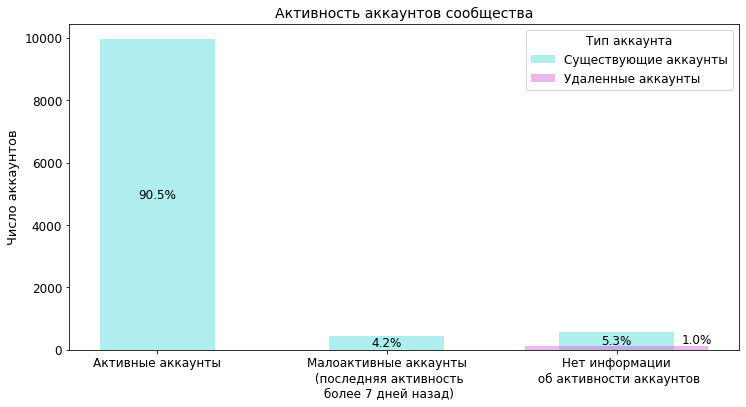

True

<Figure size 432x288 with 0 Axes>

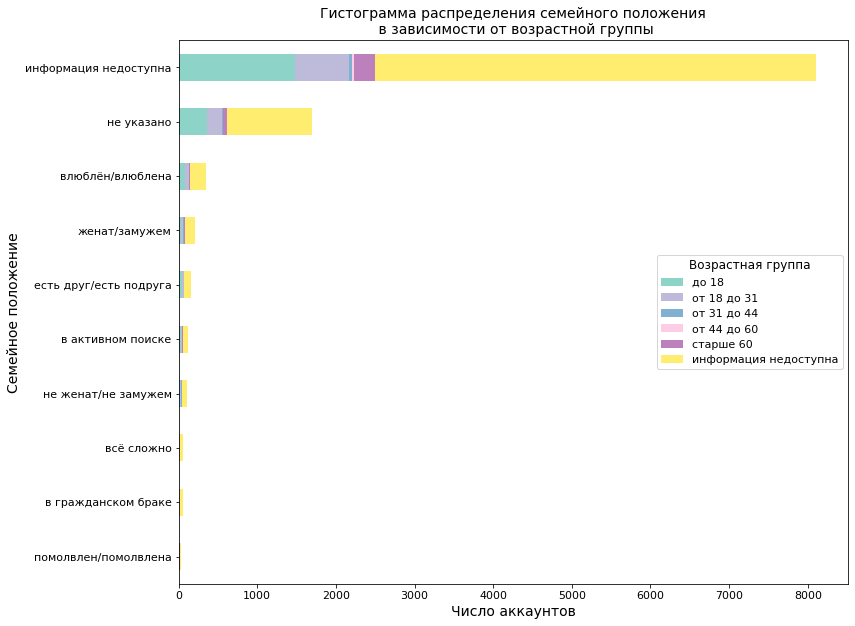

<Figure size 432x288 with 0 Axes>

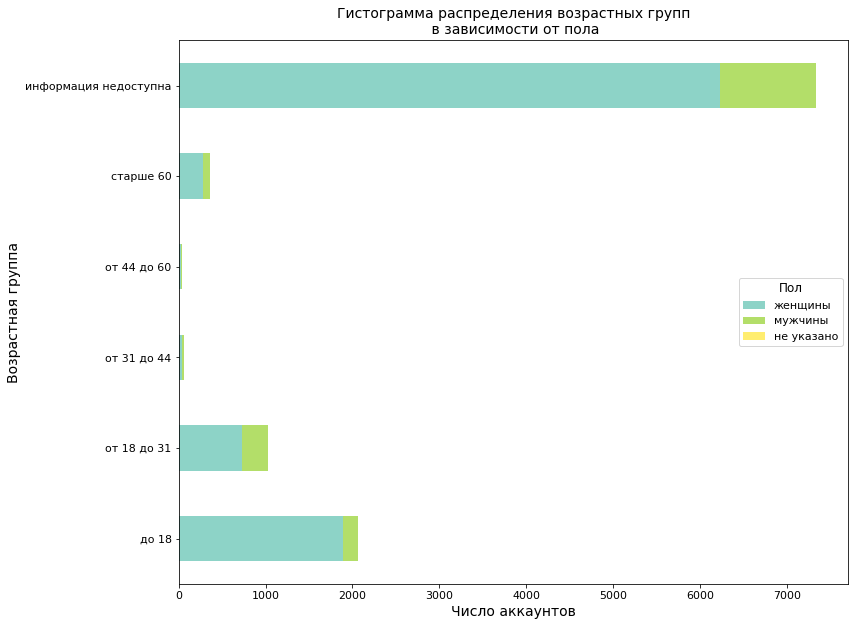

<Figure size 432x288 with 0 Axes>

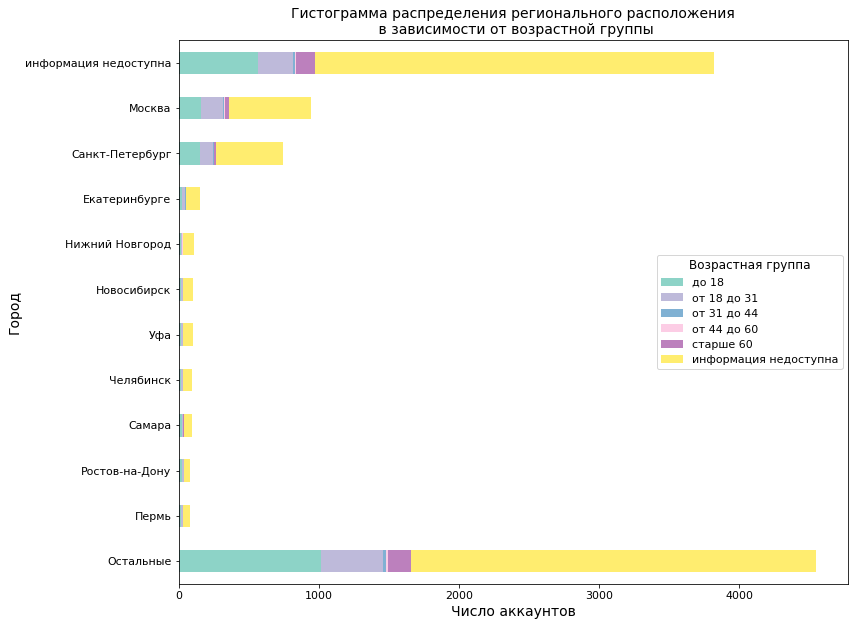

<Figure size 432x288 with 0 Axes>

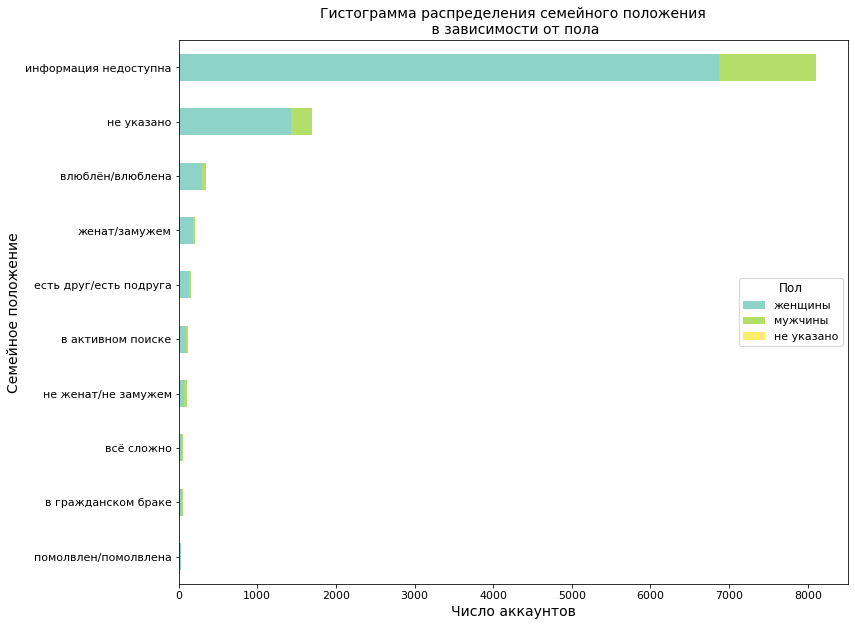

<Figure size 432x288 with 0 Axes>

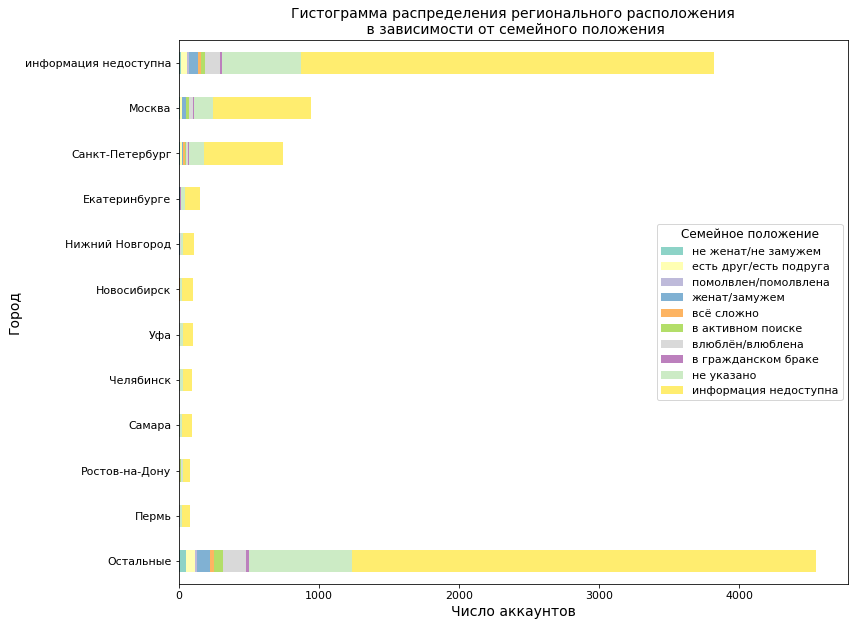

<Figure size 432x288 with 0 Axes>

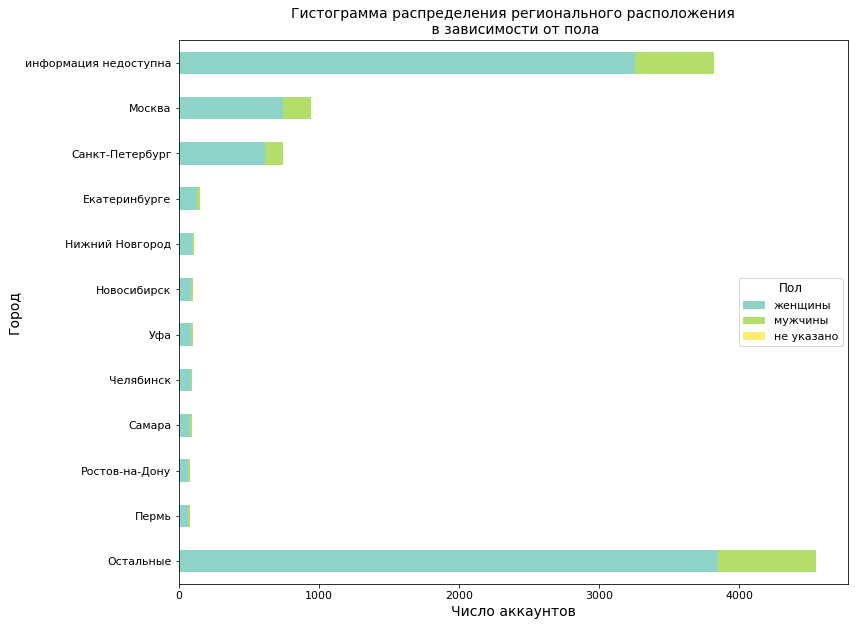

In [29]:
#akylikea
limit_of_request, var_list, domain = get_some_input()
final_operations(limit_of_request, var_list, domain)

Введите ограничение на число аккаунтов для обработки: 50000
Введите домен сообщества: ugly_plants
Целевой аудиторией сообщества "Уродливые комнатные растения" являются женщины, возраст которых - от 18 до 31, основная платформа доступа к социальной сети Вконтакте - приложение для Android, последний указанный тип занятости - студент, семейное положение - женат/замужем и проживающие в стране  - Россия, городе - Москва.


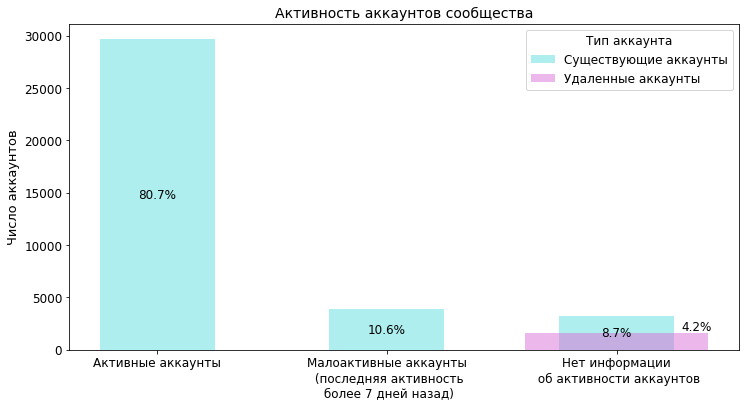

True

<Figure size 432x288 with 0 Axes>

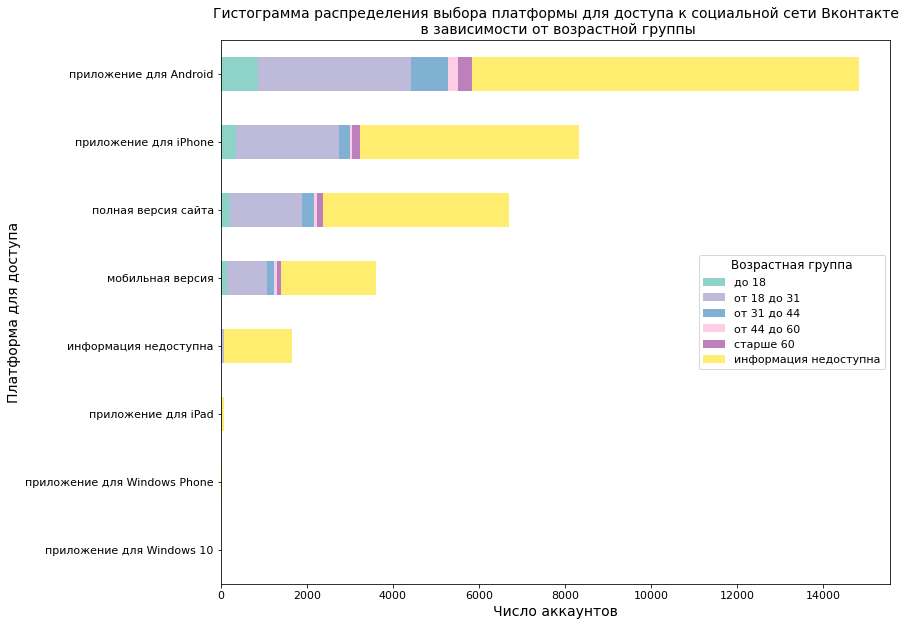

<Figure size 432x288 with 0 Axes>

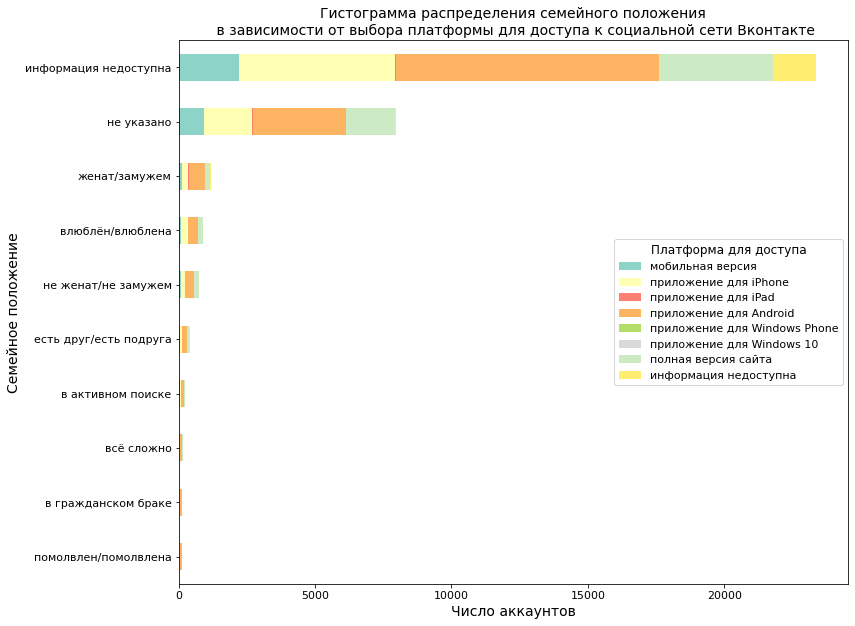

<Figure size 432x288 with 0 Axes>

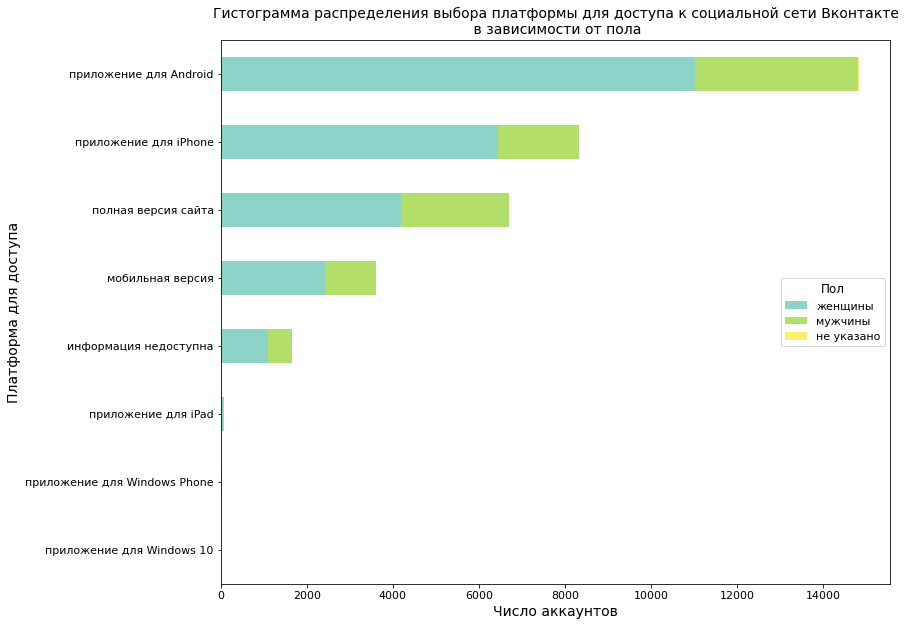

<Figure size 432x288 with 0 Axes>

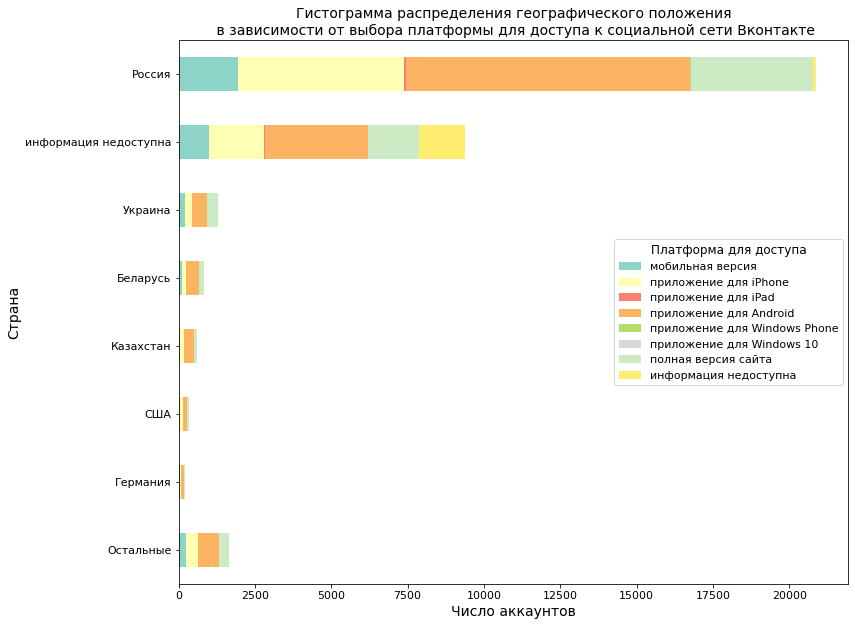

<Figure size 432x288 with 0 Axes>

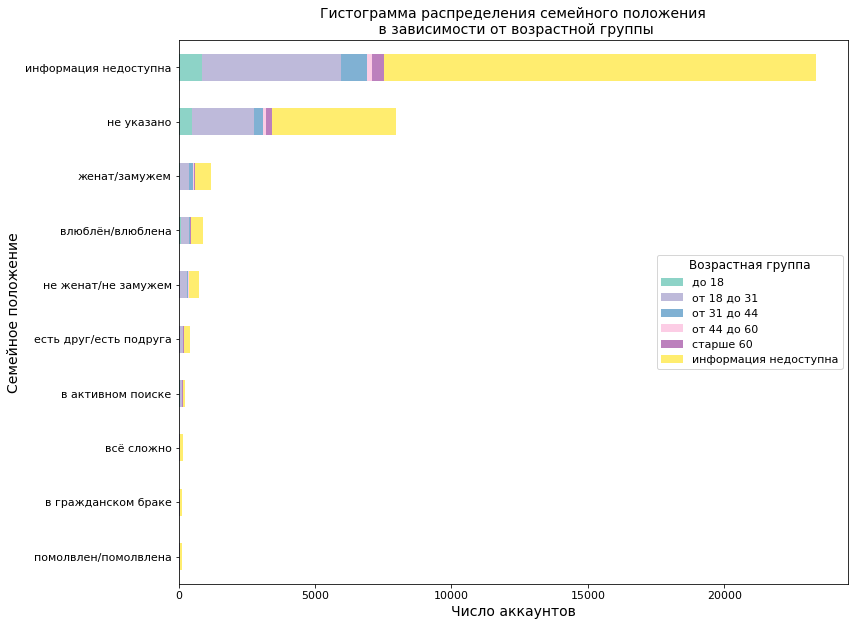

<Figure size 432x288 with 0 Axes>

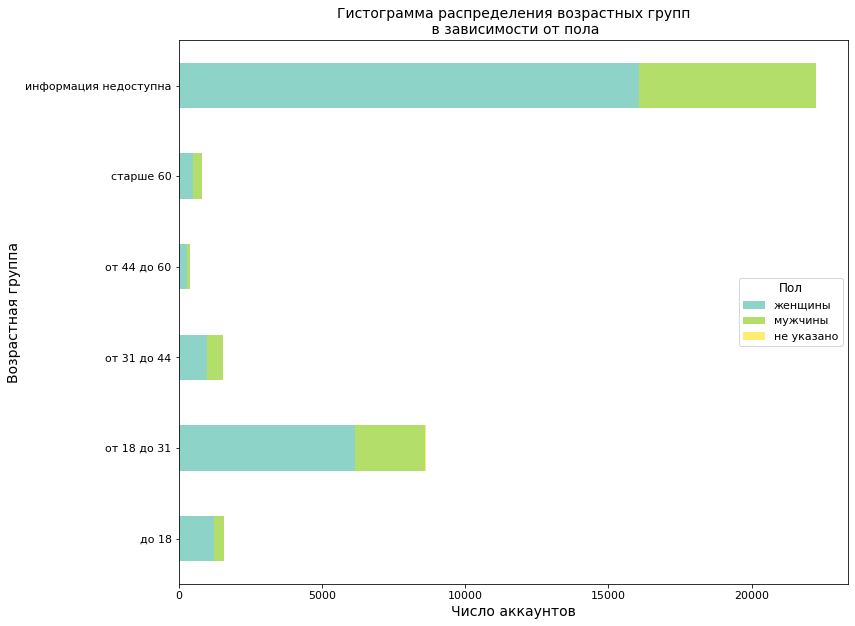

<Figure size 432x288 with 0 Axes>

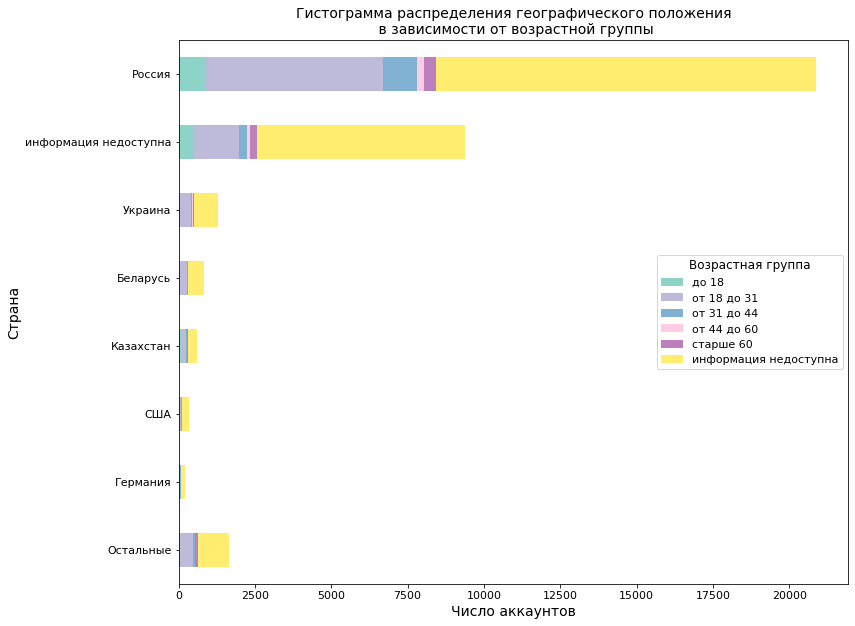

<Figure size 432x288 with 0 Axes>

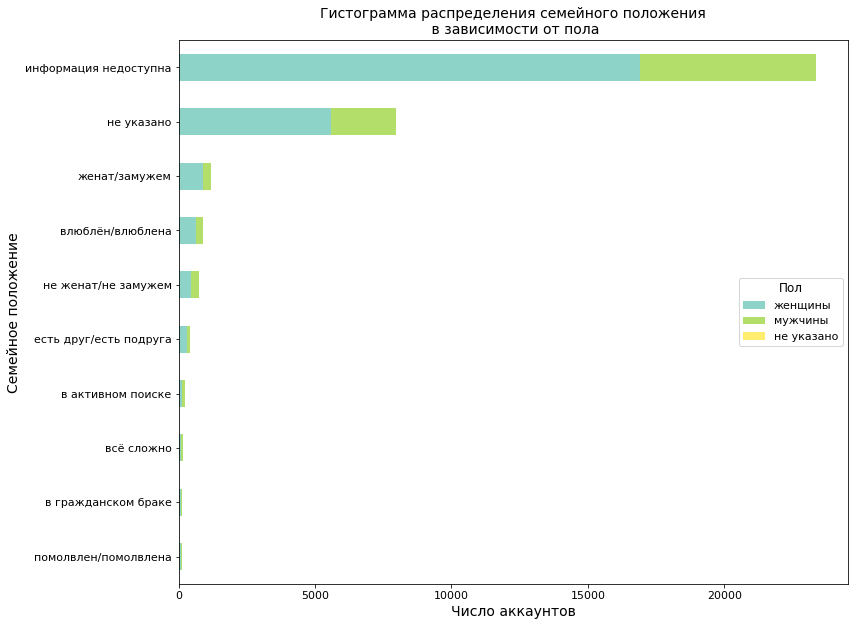

<Figure size 432x288 with 0 Axes>

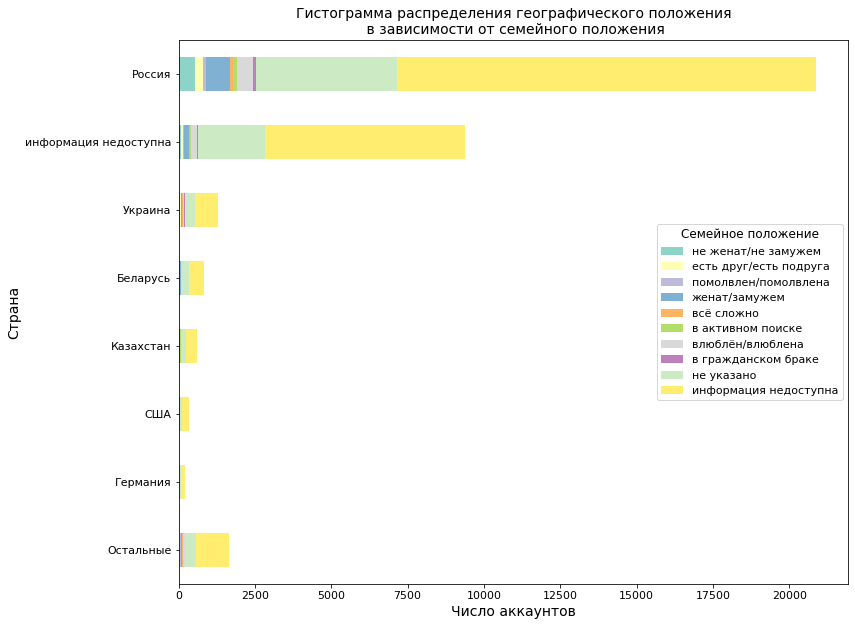

<Figure size 432x288 with 0 Axes>

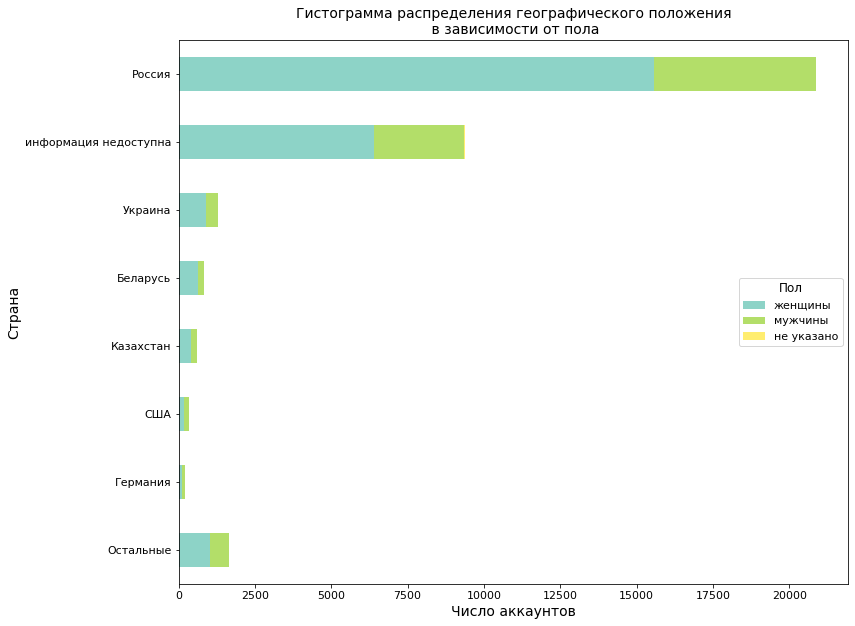

In [28]:
#ugly_plants
limit_of_request, var_list, domain = get_some_input()
final_operations(limit_of_request, var_list, domain)

Введите ограничение на число аккаунтов для обработки: 100000
Введите домен сообщества: bestad
Целевой аудиторией сообщества "Шедевры рекламы" являются женщины, возраст которых - от 31 до 44, основная платформа доступа к социальной сети Вконтакте - приложение для iPhone, последний указанный тип занятости - студент, семейное положение - женат/замужем и проживающие в стране  - Россия, городе - Санкт-Петербург.


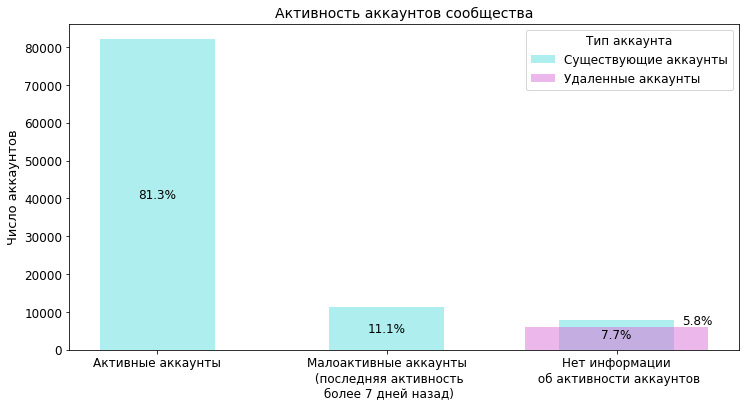

True

<Figure size 432x288 with 0 Axes>

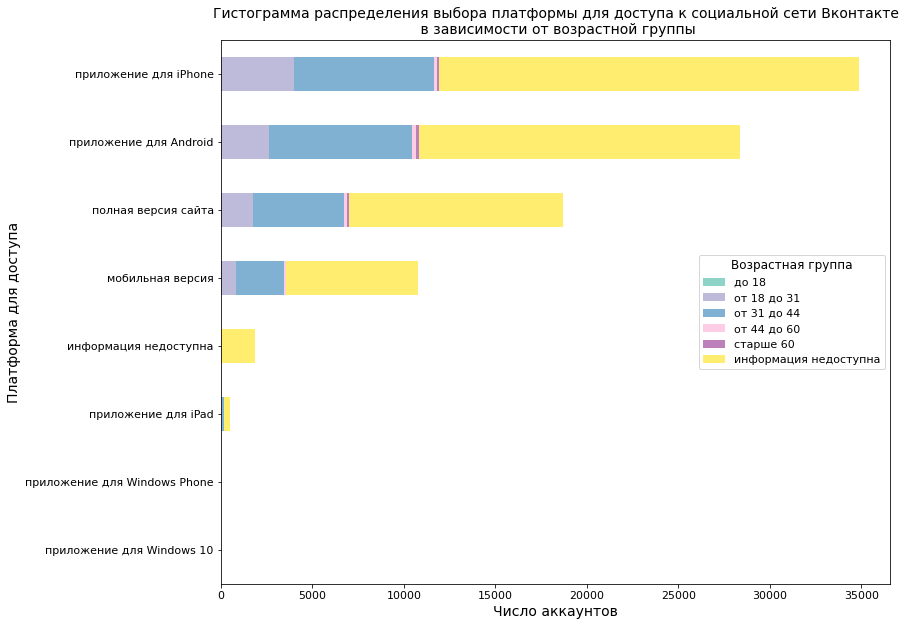

<Figure size 432x288 with 0 Axes>

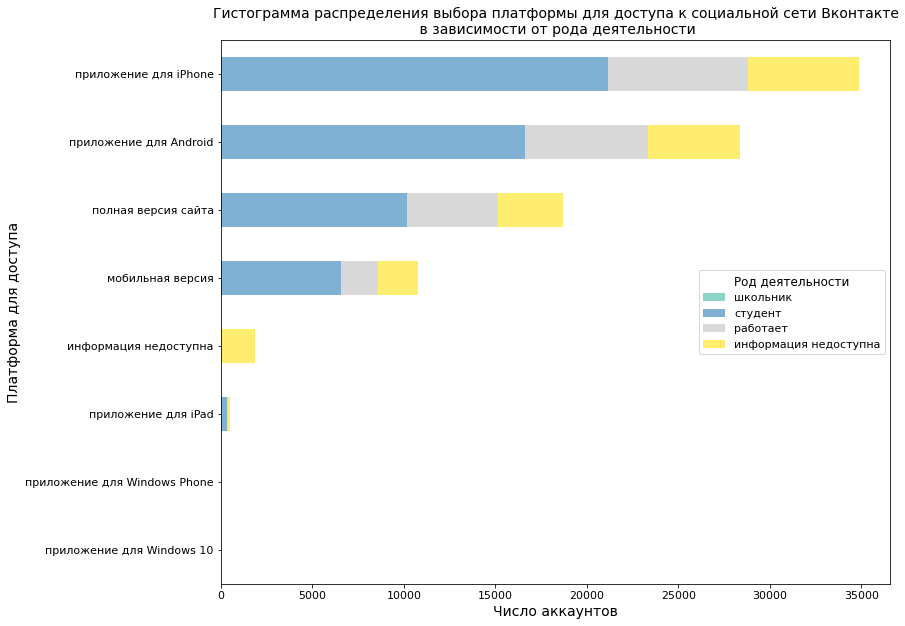

<Figure size 432x288 with 0 Axes>

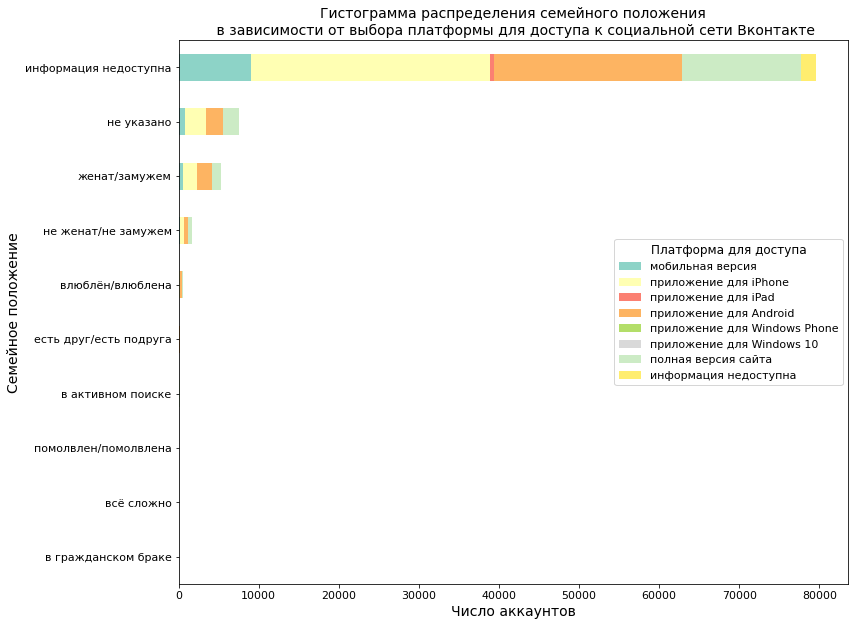

<Figure size 432x288 with 0 Axes>

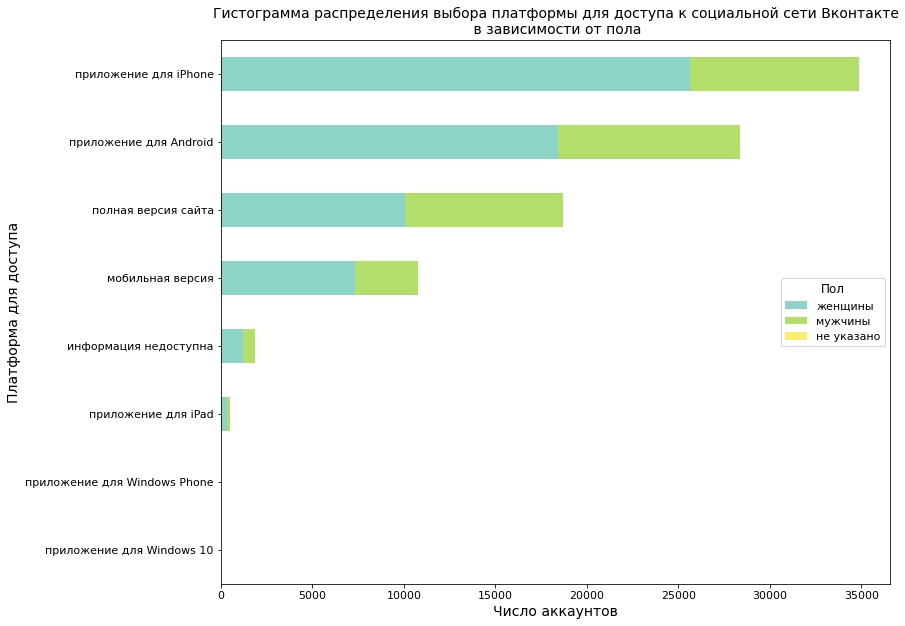

<Figure size 432x288 with 0 Axes>

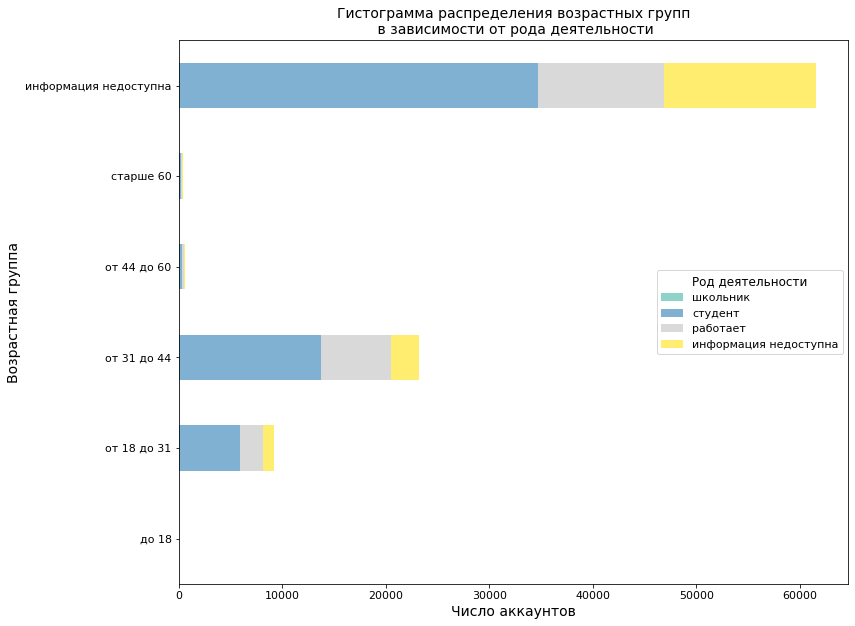

<Figure size 432x288 with 0 Axes>

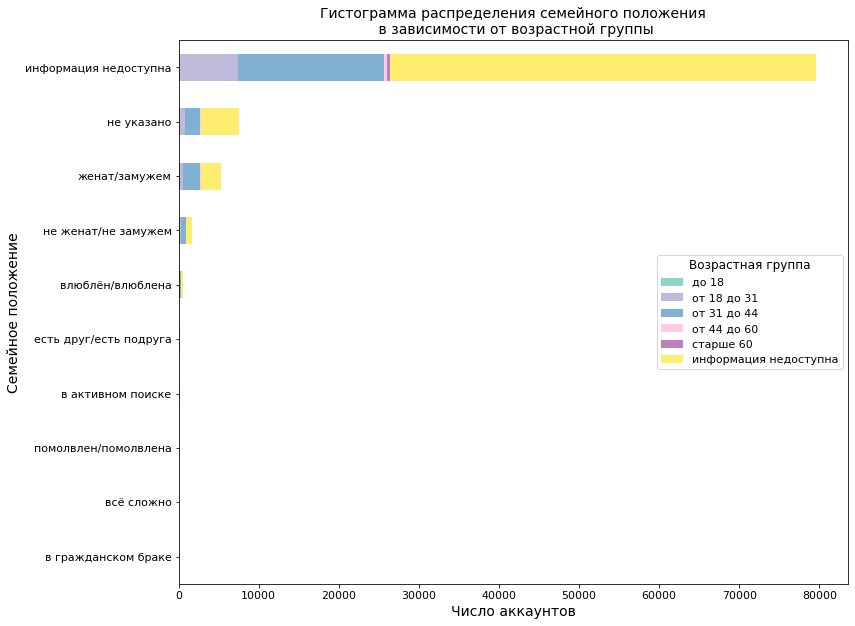

<Figure size 432x288 with 0 Axes>

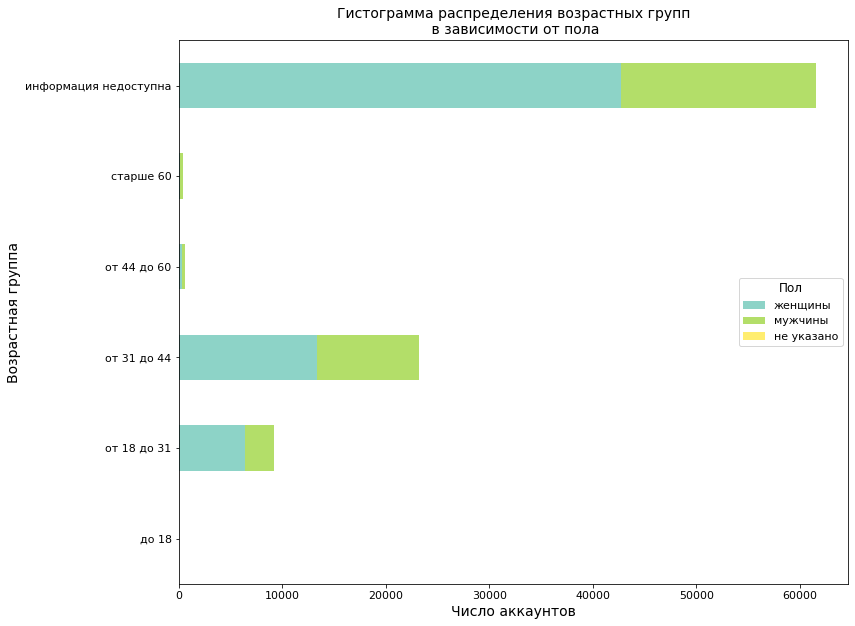

<Figure size 432x288 with 0 Axes>

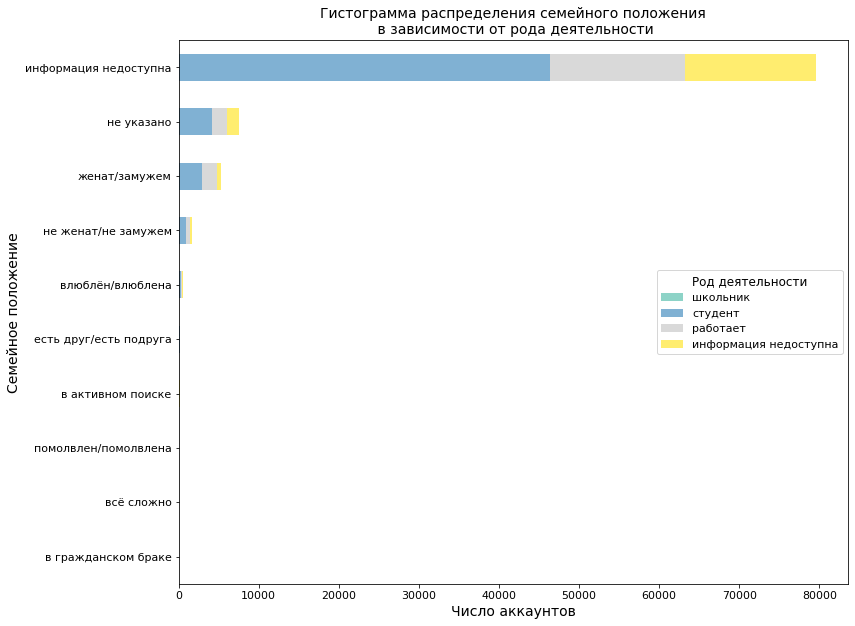

<Figure size 432x288 with 0 Axes>

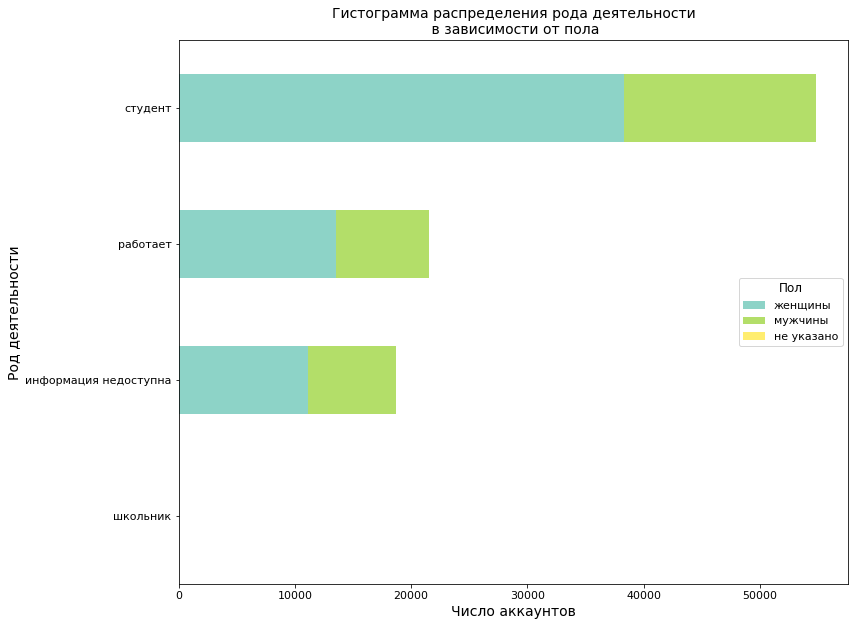

<Figure size 432x288 with 0 Axes>

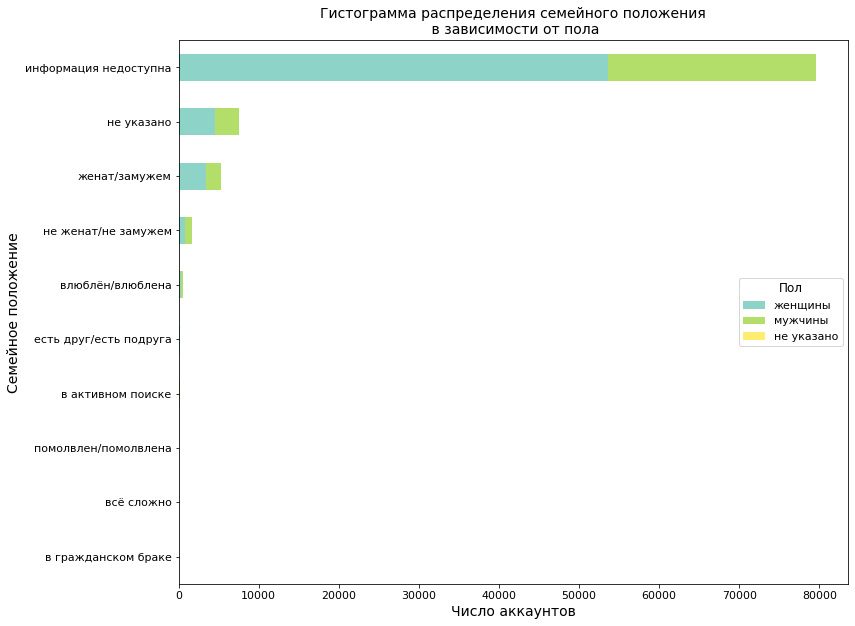

In [25]:
#bestad
limit_of_request, var_list, domain = get_some_input()
final_operations(limit_of_request, var_list, domain)

Введите ограничение на число аккаунтов для обработки: 1000000
Введите домен сообщества: bestad
Целевой аудиторией сообщества "Шедевры рекламы" являются женщины, возраст которых - от 18 до 31, основная платформа доступа к социальной сети Вконтакте - приложение для Android, последний указанный тип занятости - студент, семейное положение - женат/замужем и проживающие в стране  - Россия, городе - Москва.


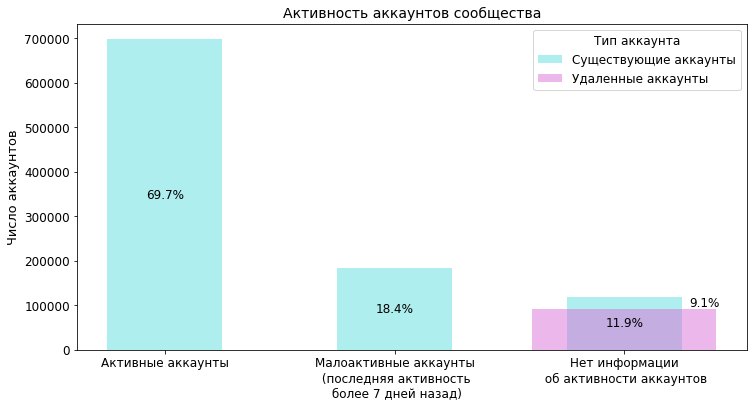

True

In [26]:
#bestad
limit_of_request, var_list, domain = get_some_input()
final_operations(limit_of_request, var_list, domain)